In [39]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, neighbors, svm
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.ensemble import RandomForestClassifier
#from pandas_ml import ConfusionMatrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

### Reading the Excel Files

In [0]:
df_1 = pd.read_excel("processed16.xlsx", index = False) 
df_2 = pd.read_excel("processed17.xlsx", index = False) 
df_3 = pd.read_excel("processed20.xlsx", index = False) 
df_4 = pd.read_excel("processed21.xlsx", index = False) 

#Test Files
df_5 = pd.read_excel("test1.xlsx", index = False)
df_6 = pd.read_excel("test2.xlsx", index = False)



### Removing Unnecessary Columns

In [0]:
del df_1["No"]
del df_2["No"]
del df_3["No"]
del df_4["No"]

#print(df_1.head())
#print(df_2.head())
#print(df_3.head())
#print(df_4.head())

#del df_5["No"]
del df_6["No"]

In [0]:
df_test = pd.read_excel("pr_data.xlsx", index = False) 
print(df_test.head)

<bound method NDFrame.head of          M0_x      M1_x      M2_x      M3_x      M4_x     MD0_x     MD1_x  \
0    0.041464  0.100127  0.099687  0.089211  0.078996  0.107412  0.137448   
1    0.006219  0.023841  0.068824  0.076320  0.072612  0.032704  0.047980   
2    0.018007  0.012113  0.021897  0.056120  0.064658 -0.011642  0.004028   
3    1.394119  0.637284  0.463757  0.380592  0.272194  1.601774  0.381614   
4    2.066465  1.730292  1.113678  0.864434  0.717767  2.666776  2.216044   
5   -0.772258  0.647104  0.896109  0.642194  0.537096 -1.075519  0.286390   
6   -2.402264 -1.587261 -0.369352  0.071516  0.033302 -2.208205 -1.643617   
7    0.884035  0.932458  0.641262  0.395984  0.382602  0.877254  0.951996   
8    0.372926  0.628481  0.744720  0.573848  0.391355  0.355057  0.571938   
9    0.255701  0.314314  0.504221  0.621863  0.509968  0.263803  0.306278   
10  -0.084218  0.085741  0.181470  0.357111  0.480091 -0.044227  0.122300   
11  -0.310420 -0.197319 -0.046313  0.058497  0

### Removing the First Rows for Concatenation

In [0]:
frames = [df_1, df_2, df_3, df_4]
df_final = pd.concat(frames)

In [0]:
pd.set_option('display.max_rows', 300) #Maxing out the columns for display
df_final = df_final.reset_index(drop=True)

### Final Dataframe for Analysis

In [0]:
print(df_final)

         M0_x      M1_x      M2_x     MD0_x     MD1_x     MD2_x     SD0_x  \
0    1.394119  0.637284  0.463757  1.601774  0.381614  0.276994  1.245807   
1    2.066465  1.730292  1.113678  2.666776  2.216044  0.914209  1.927013   
2    1.161569  0.503600  0.306685  1.195601  0.385100  0.270009  1.206749   
3    2.305346  1.733458  1.104182  2.799916  2.220912  1.056708  1.846857   
4   -0.276192  1.014577  1.063574 -0.517206  0.962020  1.163994  1.269491   
5    1.057980  0.603456  0.409548  0.980821  0.322531  0.240121  0.899796   
6    2.963837  2.010909  1.390250  3.064371  1.941753  0.980821  0.985041   
7    0.090732  1.527285  1.370850  0.146130  1.906460  1.349082  1.729395   
8    1.682016  1.166846  0.876524  1.263351  0.734280  0.547395  1.686127   
9    1.964294  1.821785  1.432662  2.084320  2.017066  1.192319  2.037052   
10   1.537479  0.873637  0.616415  1.265599  0.525798  0.369131  1.497012   
11   2.865773  2.195051  1.528945  2.974531  1.946673  0.903831  1.511951   

In [0]:
#X = np.array(df_final.drop(['maneuver'], 1))
#y = np.array(df_final['maneuver'])

X_1 = np.array(df_5.drop(['maneuver'], 1))
y_1 = np.array(df_5['maneuver'])

X_2 = np.array(df_6.drop(['maneuver'], 1))
y_2 = np.array(df_6['maneuver'])


In [0]:
print(y_1)

['Non-aggressive event' 'Non-aggressive event' 'Non-aggressive event'
 'Aggressive right turn' 'Aggressive right turn' 'Aggressive right turn'
 'Aggressive right turn' 'Non-aggressive event' 'Non-aggressive event'
 'Non-aggressive event' 'Non-aggressive event' 'Non-aggressive event'
 'Aggressive right turn' 'Aggressive right turn' 'Aggressive right turn'
 'Aggressive right turn' 'Aggressive right turn' 'Aggressive left turn'
 'Aggressive left turn' 'Aggressive left turn' 'Aggressive left turn'
 'Aggressive left turn' 'Aggressive left turn' 'Aggressive left turn'
 'Aggressive left turn' 'Aggressive left turn' 'Non-aggressive event'
 'Non-aggressive event' 'Non-aggressive event' 'Non-aggressive event'
 'Non-aggressive event' 'Aggressive left turn' 'Aggressive left turn'
 'Aggressive left turn' 'Aggressive left turn' 'Aggressive left turn'
 'Aggressive right turn' 'Aggressive right turn' 'Aggressive right turn'
 'Aggressive right turn' 'Aggressive right turn' 'Aggressive left turn'
 'Aggr

## Exploratory Data Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000008BD4CC0EB8>]],
      dtype=object)

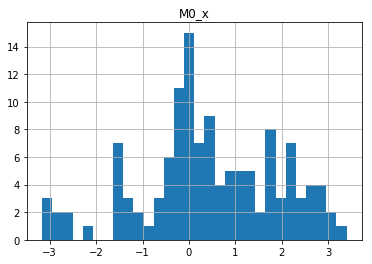

In [0]:
df_final.hist(column='M0_x', bins = 30)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000008BD4CDFC88>]],
      dtype=object)

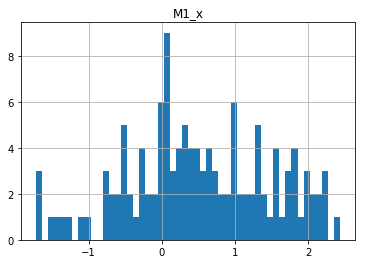

In [0]:
df_final.hist(column='M1_x', bins = 50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000008BD4E15860>]],
      dtype=object)

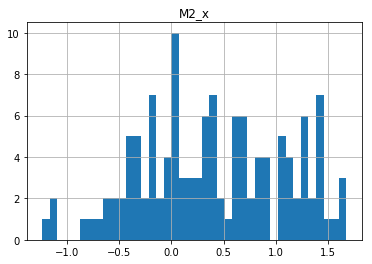

In [0]:
df_final.hist(column='M2_x', bins = 40)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000008BD4EEC400>]],
      dtype=object)

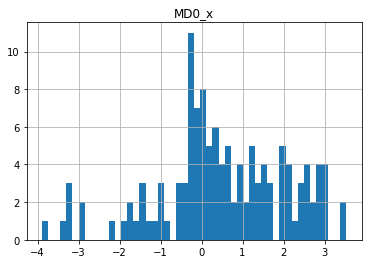

In [0]:
df_final.hist(column='MD0_x', bins = 50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000008BD4FB2940>]],
      dtype=object)

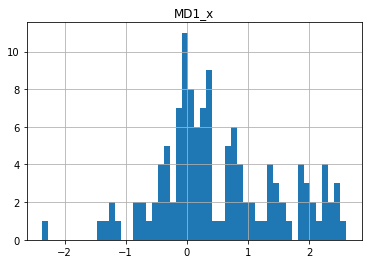

In [0]:
df_final.hist(column='MD1_x', bins = 50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000008BD38CE240>]],
      dtype=object)

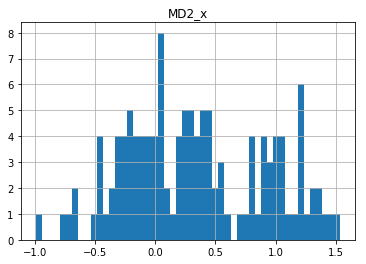

In [0]:
df_final.hist(column='MD2_x', bins = 50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000008BD4AE0EB8>]],
      dtype=object)

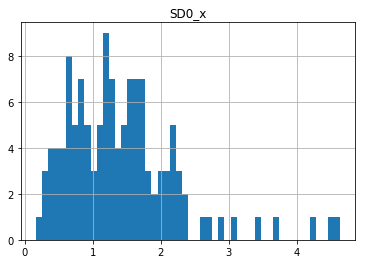

In [0]:
df_final.hist(column='SD0_x', bins = 50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000008BD4BD66D8>]],
      dtype=object)

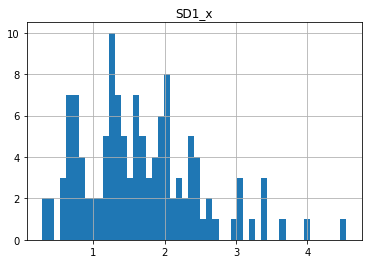

In [0]:
df_final.hist(column='SD1_x', bins = 50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000008BD3985048>]],
      dtype=object)

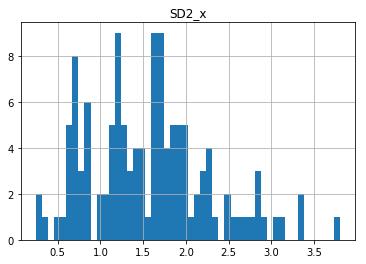

In [0]:
df_final.hist(column='SD2_x', bins = 50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000008BD38D6A90>]],
      dtype=object)

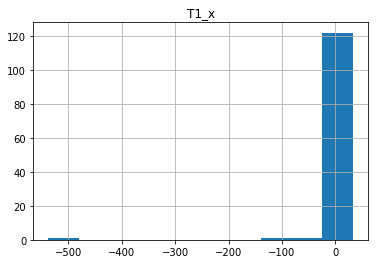

In [0]:
df_final.hist(column='T1_x', bins = 10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000008BD2CFD5C0>]],
      dtype=object)

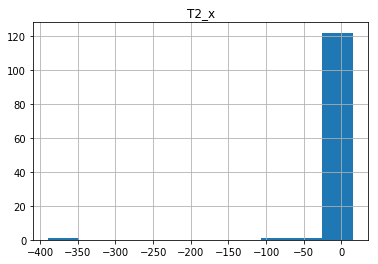

In [0]:
df_final.hist(column='T2_x', bins = 10)

### Normalized Data

In [0]:
temp_df = df_final.drop(['maneuver'], 1)
#df_final.dtypes
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

normalized_df = normalize(temp_df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000008BD5272358>]],
      dtype=object)

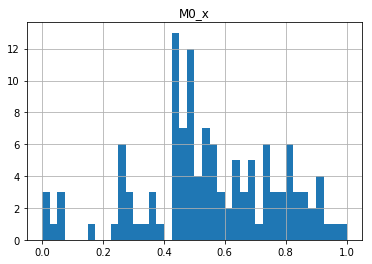

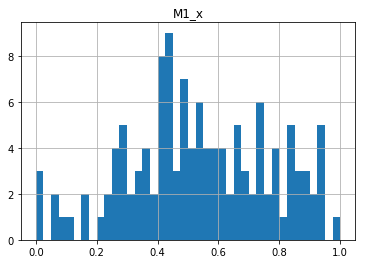

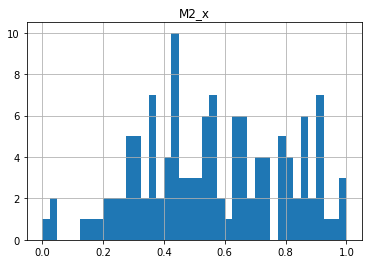

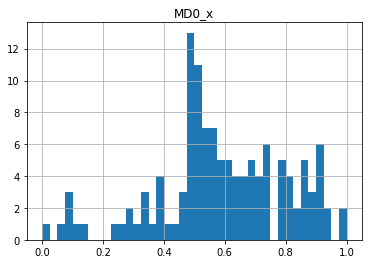

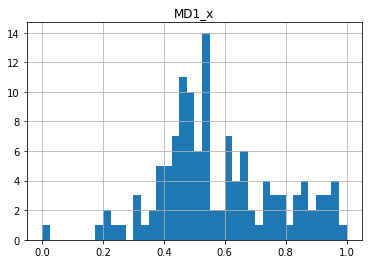

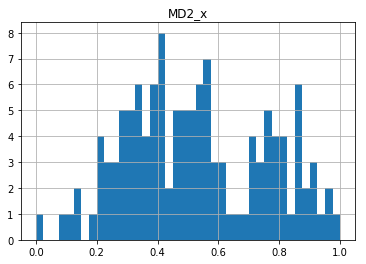

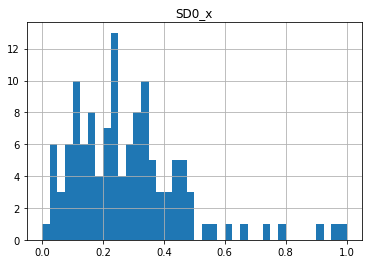

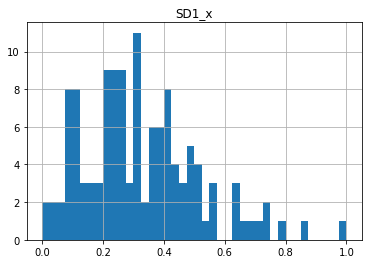

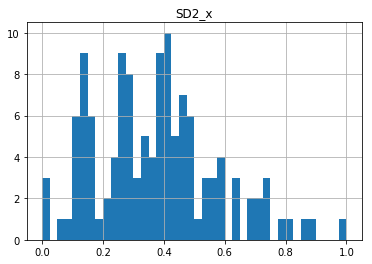

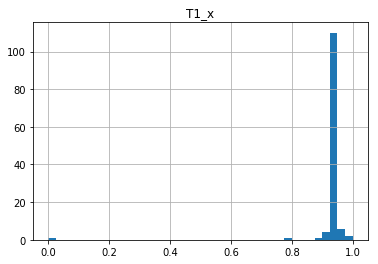

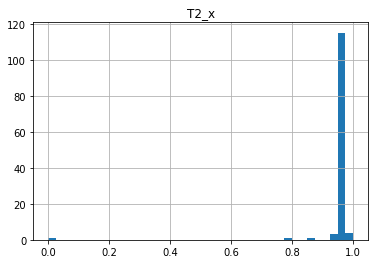

In [0]:
normalized_df.hist(column='M0_x', bins = 40)
normalized_df.hist(column='M1_x', bins = 40)
normalized_df.hist(column='M2_x', bins = 40)
normalized_df.hist(column='MD0_x', bins = 40)
normalized_df.hist(column='MD1_x', bins = 40)
normalized_df.hist(column='MD2_x', bins = 40)
normalized_df.hist(column='SD0_x', bins = 40)
normalized_df.hist(column='SD1_x', bins = 40)
normalized_df.hist(column='SD2_x', bins = 40)
normalized_df.hist(column='T1_x', bins = 40)
normalized_df.hist(column='T2_x', bins = 40)

In [14]:
from abc import ABC, abstractmethod 

In [15]:
class maneuver_classifier(ABC):
    @abstractmethod
    def __init__(self, dataframe):
        self.dataframe = dataframe
        pass
    
    def train_data(self): #Trains on the provided data set
        pass
    
    def predict_data(self): #Predicts and tell the accuracy of the trained algorithm
        pass
    
    def normalize_data(self): #Normalizes data based on the requirement
        pass

In [40]:
class SVM_algo(maneuver_classifier):
    def __init__(self, dataframe):
        self.dataframe = dataframe
        self.algo = None
    
    def train_data(self): #Trains on the provided data set
        X = np.array(self.dataframe[:, :-1])
        y = np.array(self.dataframe[:, -1])
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
        
        # defining parameter range 
        param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf', 'linear']} 
        
        grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)

        grid.fit(X_train, y_train) 
        
        self.algo = grid
        
        # print best parameter after tuning 
        print(grid.best_params_) 

        # print how our model looks after hyper-parameter tuning 
        print(grid.best_estimator_) 
        
        grid_predictions = grid.predict(X_test) 
        
        print(classification_report(y_test, grid_predictions)) 
        
        grid_confidence = grid.score(X_test, y_test)
        print(grid_confidence)
        
        cm = confusion_matrix(y_test, grid_predictions)
        
        print(cm)
        
        plot_confusion_matrix(grid, X_test, y_test)
        #cm.plot()
        
        plt.show()

        
        
        
    def predict_data(self, data): #Predicts and tell the accuracy of the trained algorithm
        data = ret_normalize_data(data)
        X = np.array(data[:, :-1])
        y = np.array(data[:, -1])
        
        grid_prediction = self.algo.predict(X)
        print(classification_report(y_test, grid_predictions)) 
        
        
        pass
    
    def normalize_data(self): #Normalizes data based on the requirement
        df = self.dataframe.drop(['maneuver'], 1)
        result = df.copy()
        for feature_name in df.columns:
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
        result = np.column_stack([result,self.dataframe['maneuver']])
        self.dataframe = result
        pass

    def ret_normalize_data(self, data): #Normalizes data based on the requirement
        df = data.drop(['maneuver'], 1)
        result = df.copy()
        for feature_name in df.columns:
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
        result = np.column_stack([result,data['maneuver']])
        return result
        pass



In [37]:
class random_forest_algo(maneuver_classifier):
    def __init__(self, dataframe):
        self.dataframe = dataframe
        pass
    
    def train_data(self): #Trains on the provided data set
        X = np.array(self.dataframe[:, :-1])
        y = np.array(self.dataframe[:, -1])
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
        
        forest = RandomForestClassifier(random_state = 1)

        n_estimators = [100, 300]
        max_depth = [5, 8, 15, 25, 30]
        min_samples_split = [2, 5, 10, 15, 100]
        min_samples_leaf = [1, 2, 5, 10] 

        hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
                      min_samples_split = min_samples_split, 
                     min_samples_leaf = min_samples_leaf)

        gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, 
                              n_jobs = -1)

        bestF = gridF.fit(X_train, y_train)
        
        y_pred = bestF.predict(X_test)
        
        print(classification_report(y_test, y_pred)) 
        
        bestF_confidence = bestF.score(X_test, y_test)
        print(bestF_confidence)
        
        cm = ConfusionMatrix(y_test, y_pred)
        
        cm.plot()
        
        plt.show()

        
        pass
    
    def predict_data(self): #Predicts and tell the accuracy of the trained algorithm
        pass
    
    def normalize_data(self): #Normalizes data based on the requirement
        df = self.dataframe.drop(['maneuver'], 1)
        result = df.copy()
        for feature_name in df.columns:
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
        result = np.column_stack([result,self.dataframe['maneuver']])
        self.dataframe = result
        pass

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.21568627450980393, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.22448979591836735, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.23404255319148937, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=0.7450980392156863, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=0.7346938775510204, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=0.7872340425531915, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ......................

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.7s finished
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
                              precision    recall  f1-score   support

     Aggressive acceleration       1.00      1.00      1.00         9
         Aggressive breaking       1.00      1.00      1.00         5
        Aggressive left turn       0.94      1.00      0.97        15
Aggressive right lane change       0.75      0.75      0.75         4
       Aggressive right turn       1.00      0.79      0.88        19
        Non-aggressive event       0.71      0.91      0.80        11

                   micro avg       0.90      0.90      0.90        63
                   macro avg       0.90      0.91      0.90        63
                weighted avg       0.92      0.90      0.91        63

0.9047619047619048


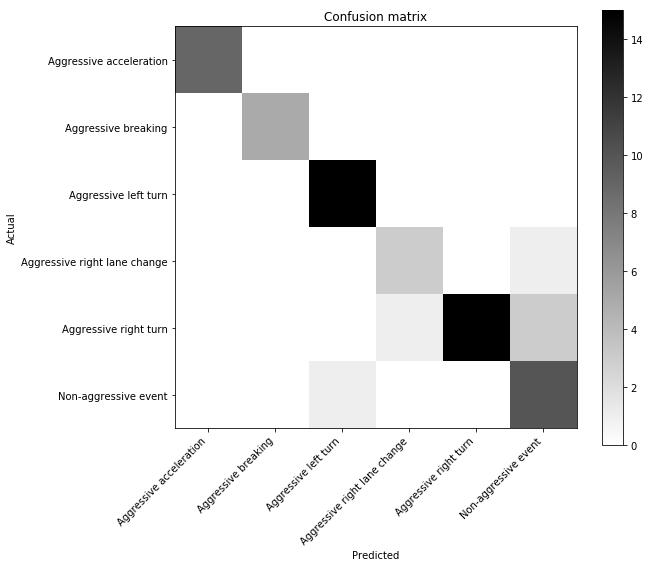

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.38461538461538464, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.3673469387755102, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.43478260869565216, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=0.36538461538461536, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=0.42857142857142855, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ......... C=0.1, gamma=1, kernel=linear, score=0.5, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ...........................

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.5s finished
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


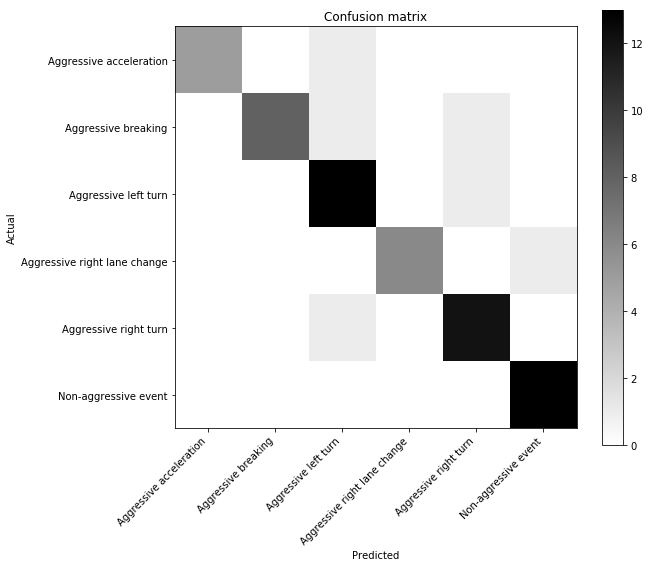

In [0]:
#A = SVM_algo(df_final)
#A.normalize_data()
#A.train_data()

A = SVM_algo(df_5)
A.normalize_data()
A.train_data()

B = SVM_algo(df_6)
B.normalize_data()
B.train_data()



C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.5882352941176471, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.3541666666666667, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ......... C=0.1, gamma=1, kernel=rbf, score=0.4375, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=0.49019607843137253, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=0.5416666666666666, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=0.4791666666666667, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ...........................

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.9s finished
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


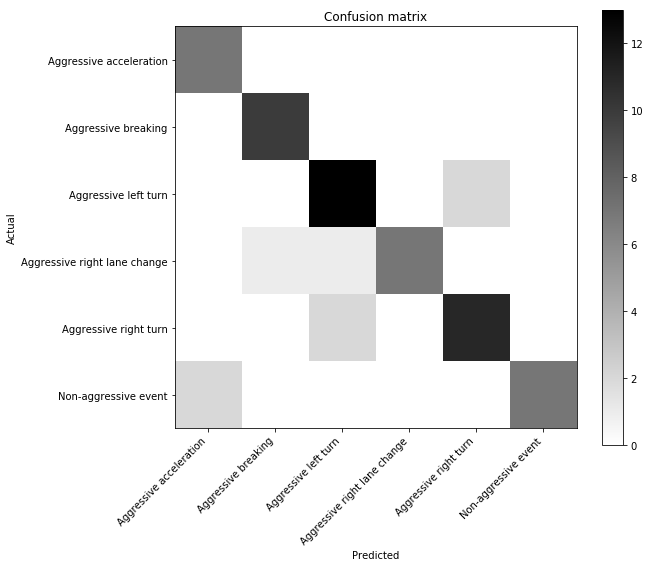

In [0]:
#B = SVM_algo(df_test)
#B.normalize_data()
#B.train_data()

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  3.0min finished
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


                              precision    recall  f1-score   support

     Aggressive acceleration       1.00      1.00      1.00         6
         Aggressive breaking       0.73      1.00      0.84         8
        Aggressive left turn       0.75      0.90      0.82        10
Aggressive right lane change       1.00      0.43      0.60         7
       Aggressive right turn       0.95      1.00      0.97        19
        Non-aggressive event       0.91      0.77      0.83        13

                   micro avg       0.87      0.87      0.87        63
                   macro avg       0.89      0.85      0.84        63
                weighted avg       0.89      0.87      0.86        63

0.873015873015873


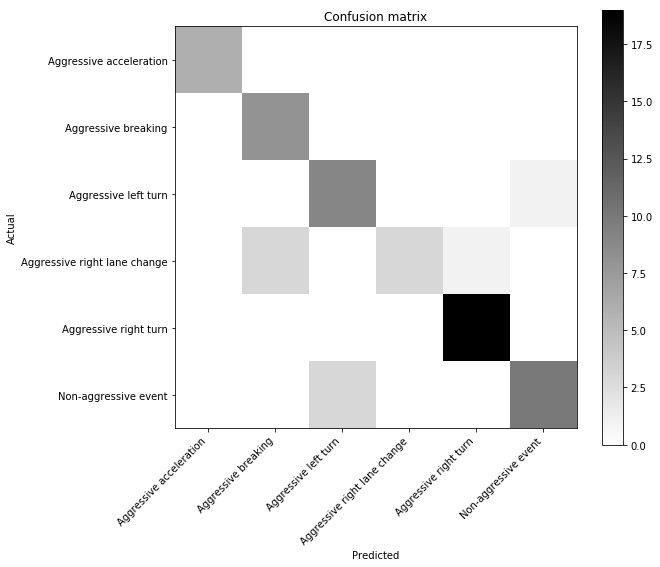

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  3.5min finished
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


                              precision    recall  f1-score   support

     Aggressive acceleration       0.71      1.00      0.83         5
         Aggressive breaking       0.40      0.50      0.44         4
        Aggressive left turn       0.76      0.62      0.68        21
Aggressive right lane change       0.80      0.57      0.67         7
       Aggressive right turn       0.71      0.75      0.73        16
        Non-aggressive event       0.83      1.00      0.91        10

                   micro avg       0.73      0.73      0.73        63
                   macro avg       0.70      0.74      0.71        63
                weighted avg       0.74      0.73      0.73        63

0.7301587301587301


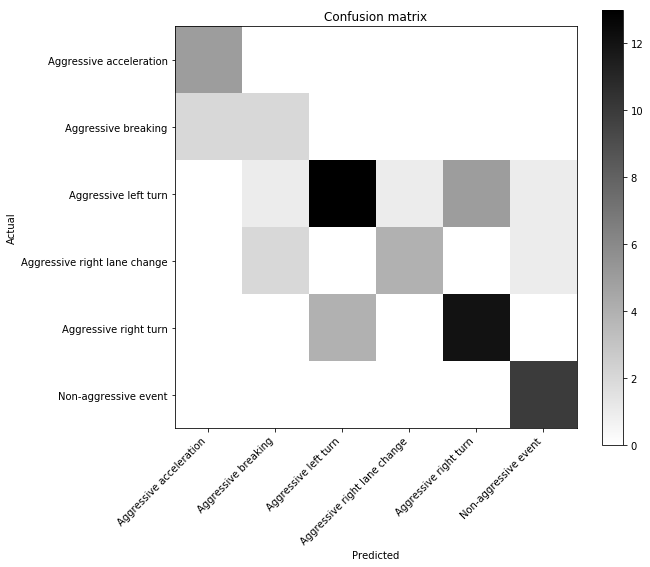

In [0]:
#C = random_forest_algo(df_test)
#C.normalize_data()
#C.train_data()

C = random_forest_algo(df_5)
C.normalize_data()
C.train_data()

D = random_forest_algo(df_6)
D.normalize_data()
D.train_data()

In [0]:
X = np.array(normalized_df)
y = np.array(df_final['maneuver'])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [0]:
clf = svm.SVC(gamma = 'auto')

In [0]:
clf_1 = svm.SVC(kernel='linear', C=0.01)

In [0]:
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
print(confidence)

0.36


In [0]:
clf_1.fit(X_train, y_train)
confidence_1 = clf_1.score(X_test, y_test)
print(confidence_1)

0.24


In [0]:
example_measures = np.array([[1.39,0.6,0.4,1.4,0.3,0.2,1.2,1.1,1.17,-0.08, 0.08]])
example_measures = example_measures.reshape(len(example_measures), -1)
prediction = clf.predict(example_measures)
print(prediction)

['Aggressive right turn']


## SVM

In [0]:
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf', 'linear']}  

grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)

grid.fit(X_train, y_train) 

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.22857142857142856, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.2647058823529412, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.22580645161290322, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=0.22857142857142856, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=0.20588235294117646, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=0.3225806451612903, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf .....................

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.6s finished
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf', 'linear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [0]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [0]:
grid_predictions = grid.predict(X_test) 

In [0]:
print(classification_report(y_test, grid_predictions)) 

                              precision    recall  f1-score   support

     Aggressive acceleration       0.57      0.67      0.62         6
         Aggressive breaking       0.50      0.40      0.44         5
 Aggressive left lane change       0.50      0.50      0.50         2
        Aggressive left turn       0.40      0.50      0.44         4
Aggressive right lane change       0.50      0.33      0.40         3
       Aggressive right turn       0.40      0.40      0.40         5

                   micro avg       0.48      0.48      0.48        25
                   macro avg       0.48      0.47      0.47        25
                weighted avg       0.48      0.48      0.48        25



In [0]:
grid_confidence = grid.score(X_test, y_test)
print(grid_confidence)

0.48


## Random Forest

In [0]:
rf = RandomForestRegressor(random_state = 42)

In [0]:
print(rf.get_params())

{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 'warn', 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [0]:
forest = RandomForestClassifier(random_state = 1)

n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)

bestF = gridF.fit(X_train, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  9.0min finished
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [0]:
y_pred = bestF.predict(X_test)

In [0]:
print(classification_report(y_test, y_pred)) 

                              precision    recall  f1-score   support

     Aggressive acceleration       0.36      0.67      0.47         6
         Aggressive breaking       0.00      0.00      0.00         5
 Aggressive left lane change       0.00      0.00      0.00         2
        Aggressive left turn       1.00      0.50      0.67         4
Aggressive right lane change       0.40      0.67      0.50         3
       Aggressive right turn       0.60      0.60      0.60         5

                   micro avg       0.44      0.44      0.44        25
                   macro avg       0.39      0.41      0.37        25
                weighted avg       0.42      0.44      0.40        25



C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
bestF_confidence = bestF.score(X_test, y_test)
print(bestF_confidence)

0.44


In [32]:
train_acc_5 = pd.read_excel("train_processed_5frames_final.xlsx", "Acclerometer")
train_gyro_5 = pd.read_excel("train_processed_5frames_final.xlsx", "Gyroscope")
train_acc_6 = pd.read_excel("train_processed_6frames_final.xlsx", "Acclerometer")
train_gyro_6 = pd.read_excel("train_processed_6frames_final.xlsx", "Gyroscope")
train_acc_8 = pd.read_excel("train_processed_8frames_final.xlsx", "Acclerometer")
train_gyro_8 = pd.read_excel("train_processed_8frames_final.xlsx", "Gyroscope")

for i in range(3):
    train_acc_5 = train_acc_5.drop(train_acc_5.columns[0], axis=1)
    train_acc_6 = train_acc_6.drop(train_acc_6.columns[0], axis=1)
    train_acc_8 = train_acc_8.drop(train_acc_8.columns[0], axis=1)
    train_gyro_5 = train_gyro_5.drop(train_gyro_5.columns[0], axis = 1)
    train_gyro_6 = train_gyro_6.drop(train_gyro_6.columns[0], axis = 1)
    train_gyro_8 = train_gyro_8.drop(train_gyro_8.columns[0], axis = 1)



Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.367, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.400, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.345, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.310, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.379, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.400, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ............ C=1, gamma=1, kernel=rbf, score=0.833, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.724, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.724, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.828, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.800, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.800, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.655, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.7s finished


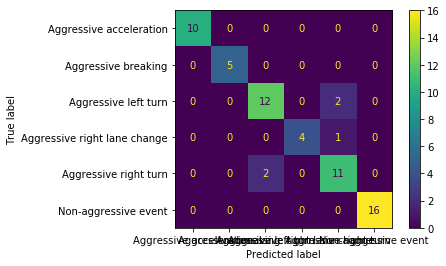

In [41]:
alg_acc_5 = SVM_algo(train_acc_5)
alg_acc_5.normalize_data()
alg_acc_5.train_data()


In [0]:
#Reading the data files for new testing
df_acc_5 = pd.read_excel("acc_5frame.xlsx", index = False)
df_acc_6 = pd.read_excel("acc_6frame.xlsx", index = False)
df_acc_8 = pd.read_excel("acc_8frame.xlsx", index = False)
df_gyro_5 = pd.read_excel("gyro_5frame.xlsx", index = False)
df_gyro_6 = pd.read_excel("gyro_6frame.xlsx", index = False)
df_gyro_8 = pd.read_excel("gyro_8frame.xlsx", index = False)
df_gyroz_6 = pd.read_excel("gyro_z_6frame.xlsx", index = False)
df_gyroz_8 = pd.read_excel("gyro_z_8frame.xlsx", index = False)
df_mag_5 = pd.read_excel("mag_5frame.xlsx", index = False)





In [0]:
#Deleting unnecessary columns
del df_acc_5["No"]
del df_gyro_5["No"]
del df_mag_5["No"]

del df_acc_6["No"]
del df_acc_6["timestamp"]
del df_acc_6["tripid"]

del df_acc_8["No"]
del df_acc_8["timestamp"]
del df_acc_8["tripid"]

del df_gyro_6["No"]
del df_gyro_6["timestamp"]
del df_gyro_6["tripid"]

del df_gyro_8["No"]
del df_gyro_8["timestamp"]
del df_gyro_8["tripid"]

del df_gyroz_6["No"]
del df_gyroz_6["timestamp"]
del df_gyroz_6["tripid"]

del df_gyroz_8["No"]
del df_gyroz_8["timestamp"]
del df_gyroz_8["tripid"]



## SVM Implementations

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.2549019607843137, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.42857142857142855, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.2553191489361702, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=0.47058823529411764, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=0.4897959183673469, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=0.48936170212765956, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ......................

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.6s finished
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


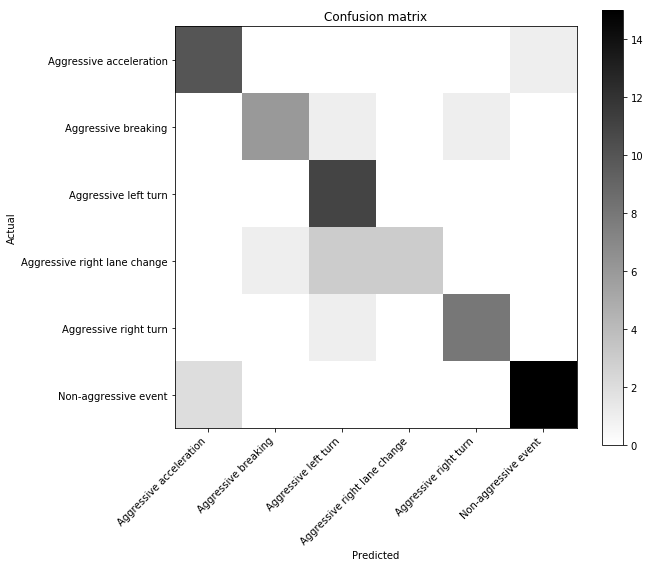

In [0]:
#Acceleration 5 frames
acc_5 = SVM_algo(df_acc_5)
acc_5.normalize_data()
acc_5.train_data()


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.32786885245901637, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.4067796610169492, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.3898305084745763, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=0.4918032786885246, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=0.4915254237288136, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=0.4745762711864407, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ........................

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.7s finished
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


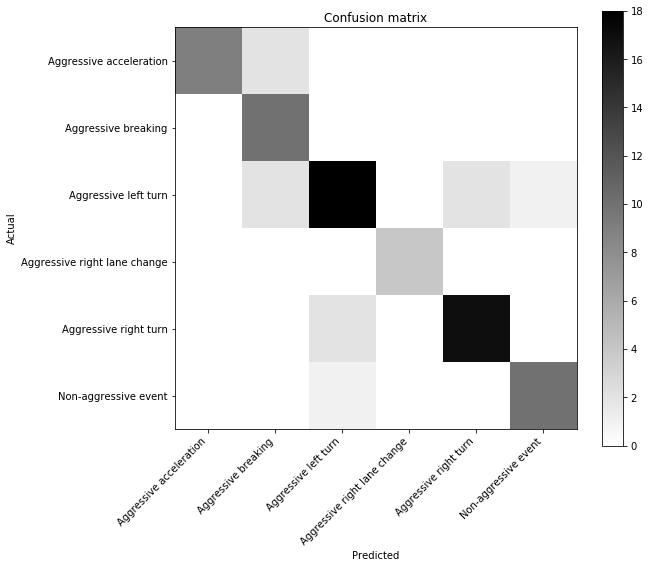

In [0]:
#Acceleration 6 frames
acc_6 = SVM_algo(df_acc_6)
acc_6.normalize_data()
acc_6.train_data()

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.23809523809523808, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.24691358024691357, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ......... C=0.1, gamma=1, kernel=rbf, score=0.2375, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=0.6071428571428571, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=0.6172839506172839, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ......... C=0.1, gamma=1, kernel=linear, score=0.6, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ................................

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    3.7s finished
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


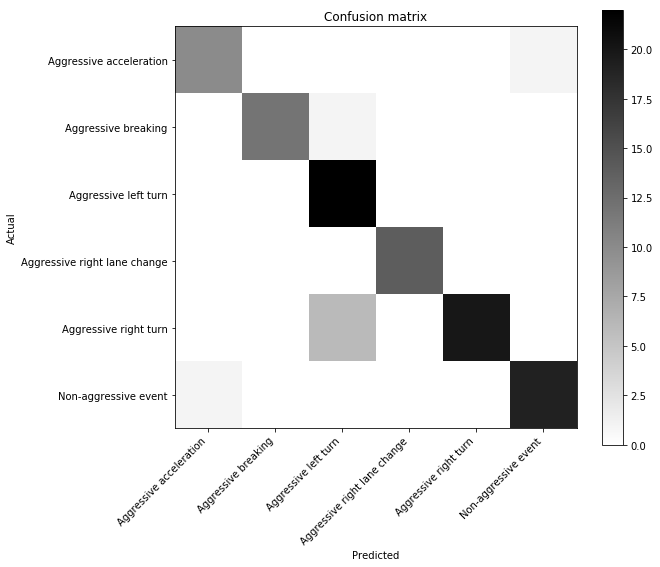

In [0]:
#Acceleration 8 frames
acc_8 = SVM_algo(df_acc_8)
acc_8.normalize_data()
acc_8.train_data()


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.2549019607843137, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.2857142857142857, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.2765957446808511, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=0.5686274509803921, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=0.6326530612244898, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=0.574468085106383, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ..........................

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.4s finished
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


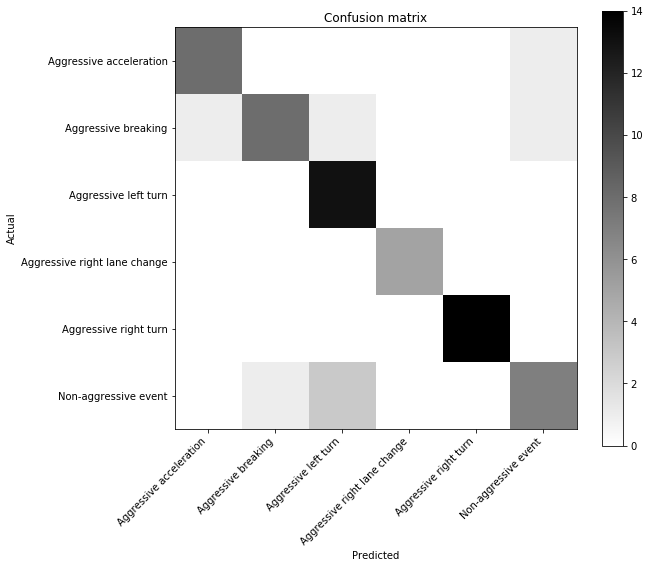

In [0]:
#Gyro 5 frames
gyro_5 = SVM_algo(df_gyro_5)
gyro_5.normalize_data()
gyro_5.train_data()


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.22580645161290322, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.23333333333333334, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.2631578947368421, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=0.5161290322580645, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=0.4166666666666667, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=0.543859649122807, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ........................

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.7s finished
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


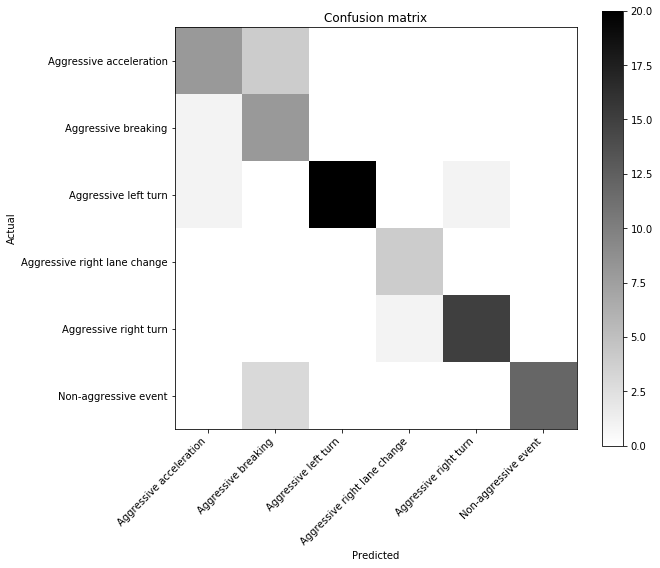

In [0]:
#Gyro 6 frames
gyro_6 = SVM_algo(df_gyro_6)
gyro_6.normalize_data()
gyro_6.train_data()


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.4523809523809524, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.4444444444444444, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.425, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=0.4642857142857143, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=0.5679012345679012, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ...... C=0.1, gamma=1, kernel=linear, score=0.5125, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ..................................

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    3.3s finished
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


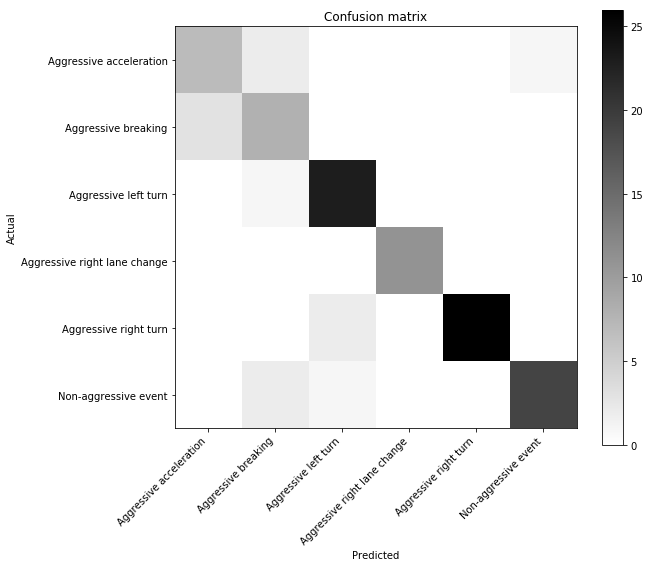

In [0]:
#Gyro 8 frames
gyro_8 = SVM_algo(df_gyro_8)
gyro_8.normalize_data()
gyro_8.train_data()


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.5245901639344263, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.5166666666666667, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.5517241379310345, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=0.4918032786885246, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ......... C=0.1, gamma=1, kernel=linear, score=0.5, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=0.5172413793103449, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ...............................

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.4s finished
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


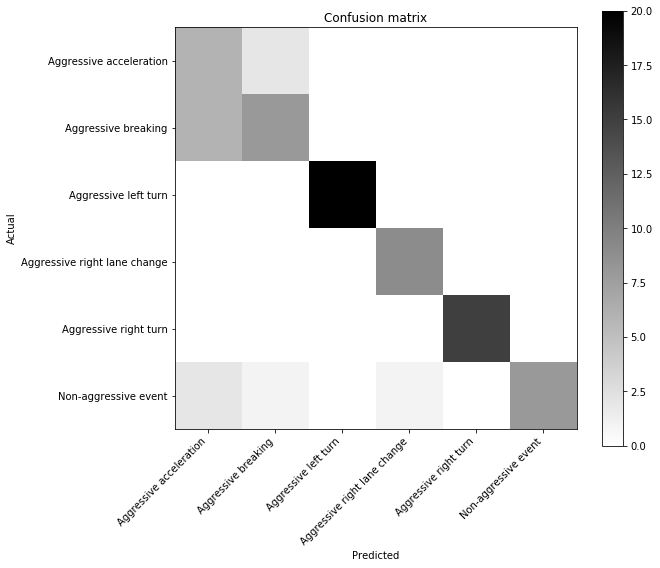

In [0]:
#Gyro_z 6 frames
gyroz_6 = SVM_algo(df_gyroz_6)
gyroz_6.normalize_data()
gyroz_6.train_data()


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.6190476190476191, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.4878048780487805, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.4936708860759494, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=0.5357142857142857, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=0.45121951219512196, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=0.4810126582278481, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ........................

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    2.3s finished
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


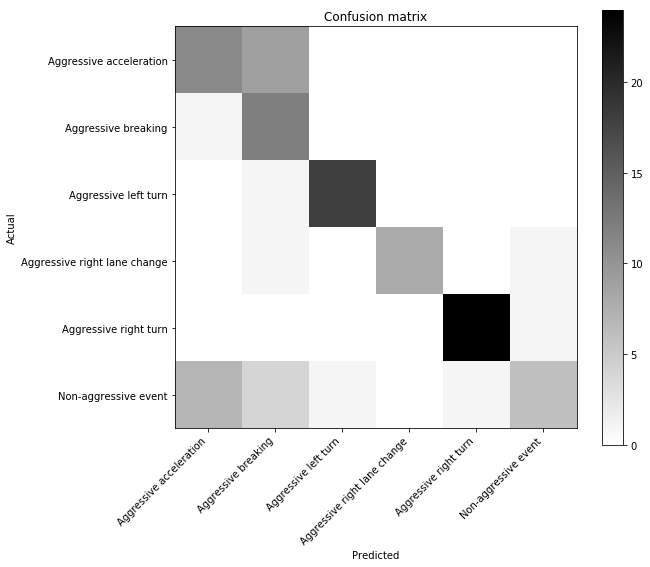

In [0]:
#Gyro_z 8 frames
gyroz_8 = SVM_algo(df_gyroz_8)
gyroz_8.normalize_data()
gyroz_8.train_data()


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.37254901960784315, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.2653061224489796, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.3617021276595745, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=0.45098039215686275, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=0.3469387755102041, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=0.40425531914893614, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ......................

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.6s finished
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


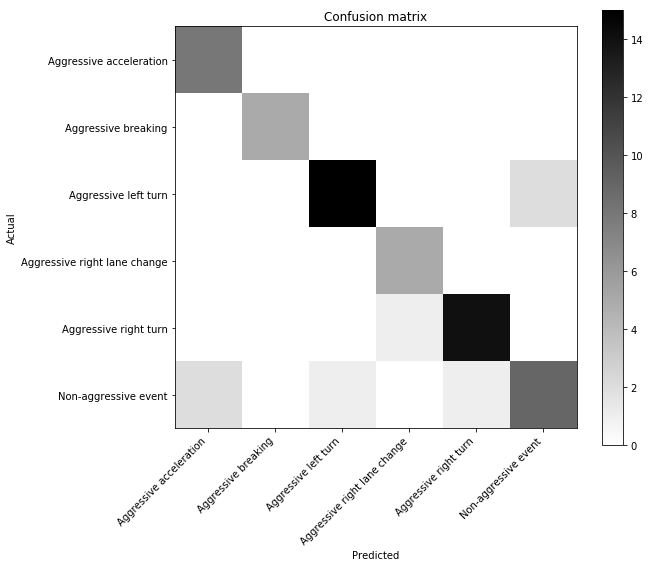

In [0]:
#Mag 5 frames
mag_5 = SVM_algo(df_mag_5)
mag_5.normalize_data()
mag_5.train_data()

In [0]:
#SVM implementation






